In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn import datasets

In [3]:
digits = datasets.load_digits()

### Info about Dataset

In [6]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [48]:
main_data = digits['data']
targets = digits['target']

In [9]:
len(main_data)

1797

In [34]:
def view_digit(index):
    plt.imshow(digits.images[index] , cmap = plt.cm.gray_r , interpolation = 'nearest')
    plt.title('Orignal it is: '+ str(digits.target[index]))
    plt.show()

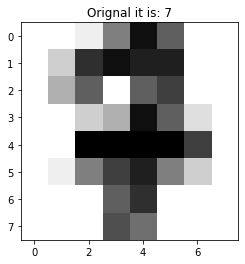

In [38]:
view_digit(17)

For this 1797 data we have to consider only 1791 as training dataset and last 6 data for validation dataset

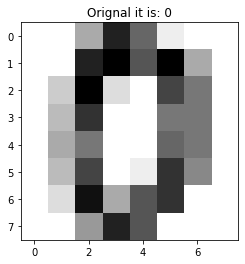

In [106]:
number = 0
plt.imshow(main_data[number].reshape(8,8,1) , cmap = plt.cm.gray_r)
plt.title('Orignal : '+ str(digits.target[number]))
plt.show()
# we can also print images from data by reshaping

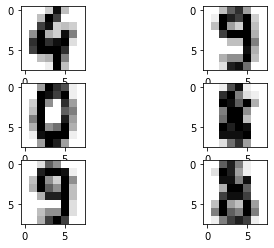

In [70]:
%matplotlib inline

plt.subplot(321)
plt.imshow(digits.images[1791], cmap=plt.cm.gray_r,
interpolation='nearest')

plt.subplot(322)
plt.imshow(digits.images[1792], cmap=plt.cm.gray_r,
interpolation='nearest')

plt.subplot(323)
plt.imshow(digits.images[1793], cmap=plt.cm.gray_r,
interpolation='nearest')

plt.subplot(324)
plt.imshow(digits.images[1794], cmap=plt.cm.gray_r,
interpolation='nearest')

plt.subplot(325)
plt.imshow(digits.images[1795], cmap=plt.cm.gray_r,
interpolation='nearest')

plt.subplot(326)
plt.imshow(digits.images[1796], cmap=plt.cm.gray_r,
interpolation='nearest')

### Support Vector Classifier

In [46]:
from sklearn import svm
svc = svm.SVC(gamma=0.001 , C = 100.)

In [49]:
svc.fit(main_data[:1790] , targets[:1790])

SVC(C=100.0, gamma=0.001)

In [50]:
predictions = svc.predict(main_data[1791:])

In [52]:
predictions , targets[1791:] 

(array([4, 9, 0, 8, 9, 8]), array([4, 9, 0, 8, 9, 8]))

From SVC we get 100% accuracy<br>
Training Data : 1790<br>
Test Data : 6

### Decision Tree Classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
dt = DecisionTreeClassifier(criterion = 'gini')

In [66]:
dt.fit(main_data[:1600] , targets[:1600]) # this time we only use 1600 as train and 197 as test

DecisionTreeClassifier()

In [67]:
predictions2 = dt.predict(main_data[1601:])

In [71]:
from sklearn.metrics import accuracy_score

In [69]:
confusion_matrix(targets[1601:] , predictions2) # as you can we have some wrong predictions

array([[17,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 17,  0,  0,  1,  0,  0,  0,  2,  0],
       [ 0,  0, 13,  1,  0,  1,  0,  1,  1,  0],
       [ 0,  2,  2,  9,  0,  3,  2,  4,  0,  0],
       [ 0,  0,  0,  0, 18,  0,  1,  2,  0,  1],
       [ 0,  0,  0,  1,  2, 15,  0,  0,  1,  0],
       [ 0,  0,  0,  1,  2,  0, 19,  0,  0,  0],
       [ 0,  0,  0,  2,  1,  0,  0, 17,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  1, 13,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  2,  1, 16]], dtype=int64)

In [72]:
accuracy_score(targets[1601:] , predictions2) 

0.7857142857142857

From Decision Tree Classifier we get 78 % Accuracy<br>
Training Data : 1600<br>
Test_data : 197

### Random Forest Classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
rc = RandomForestClassifier(n_estimators = 150)

In [101]:
rc.fit(main_data[:1500] , targets[:1500])

RandomForestClassifier(n_estimators=150)

In [102]:
predictions3 = rc.predict(main_data[1501:])

In [103]:
accuracy_score(targets[1501:] , predictions3)

0.9222972972972973

From Random Forest Classifier we get high accuracy for n_estimators = 150<br>
Training data : 1500<br>
Test Data : 297

### Conclusion

Data maters the most we need a good amount of data for modal.if we have a less data then we can use some other machine learning classifier algorithms like random forest which is also give 92 % accuracy on 1500 trainset which is less data compare to Support vector classifier